Code for drawing graph animation

In [32]:
%matplotlib inline
from network_utilities import adjacency_matrix_to_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Tuple
from IPython import display

## Code for updating a Jupyter notebook plot in realtime
## is from google AI overview from prompt
## "jupyter notebook update plot in loop"

## All code assumes nodes are consecutive integers from 0 to some max number

desired_num_vertices: int = 60

def _get_initial_positions(desired_num_vertices: int) -> Tuple[nx.Graph, dict[int, tuple[float, float]]]:
    # Put all the vertices around a circle
    A: np.array = np.zeros((desired_num_vertices,desired_num_vertices))
    G = adjacency_matrix_to_graph(A)
    pos = nx.circular_layout(G)
    return G, pos

def _configure_plot(pos: dict[int, tuple[float,float]]) -> None:
    ax = plt.gca()
    x_positions: list[float] = [x for x,_ in pos.values()]
    y_positions: list[float] = [y for _,y in pos.values()]
    ax.set_xlim(min(x_positions)-.1, max(x_positions)+.1)
    ax.set_ylim(min(y_positions)-.1, max(y_positions)+.1)
    ax.set_aspect('equal')

def _update_plot(G: nx.Graph, 
                 pos: dict[int, tuple[float, float]], 
                 vertex_set: set[int], 
                 edge_set: set[tuple[int,int]],
                 sleep_time=.5) -> None:
    desired_node_size = 200
    G.add_edges_from(edge_set)
    nx.draw_networkx_nodes(G, pos, 
                        nodelist = list(vertex_set),
                        node_color=['lightblue'],
                        node_size=desired_node_size,
                        alpha=0.8)
    nx.draw_networkx_edges(G,pos,edgelist=list(edge_set),width=0.5)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(sleep_time)


Functions for you to define

In [ ]:
import random


def add_edges_wikipedia_version(vertex_set: set[int], 
               new_vertex: int, 
               G: nx.Graph) -> set[tuple[int,int]]:
    new_edges: set[tuple[int,int]] = set()
    
    sum_k_j = G.number_of_edges() * 2 
    
    for vertex in vertex_set:
        p_i = G.degree[vertex]
        prob = p_i / sum_k_j
        if random.random() < prob:
            new_edges.add((new_vertex, vertex)) 

    return new_edges


In [14]:
def add_edges_networkx_version(vertex_set: set[int], 
               new_vertex: int, 
               G: nx.Graph,
               required_edges: int = 1) -> set[tuple[int,int]]:
    new_edges: set[tuple[int,int]] = set()

    if required_edges < 1:
        raise ValueError("must have at least one required edge")

    sum_k_j = G.number_of_edges() * 2     

    def add_if_meets_prob(curr_vertex): 
        p_i = G.degree[curr_vertex]
        prob = p_i / sum_k_j
        if random.random() < prob:
            new_edges.add((new_vertex, curr_vertex)) 
    
    for vertex in vertex_set:
        add_if_meets_prob(vertex)

    while len(new_edges) < required_edges:
        random_vertex = random.choice(list(vertex_set))        
        add_if_meets_prob(random_vertex)
            
    return new_edges


Wikipedia version

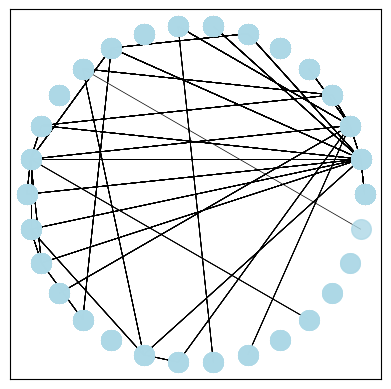

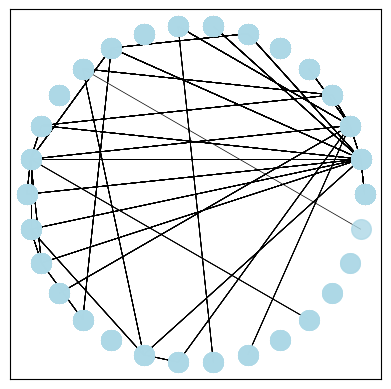

In [22]:
# Initialize drawing
G, pos = _get_initial_positions(desired_num_vertices)
_configure_plot(pos)

# m0 in the wikipedia article on Barabasi Albert network
# vertex_set: set[int] = {0,1,2,3}
vertex_set: set[int] = {0,1}
# edge_set: set[tuple[int,int]] = {(0,1),(0,2),(0,3),(1,2),(1,3)}
edge_set: set[tuple[int,int]] = {(0,1)}
# degree_dict: dict[int,int] = {0:1, 1:1}

# Add edges
while len(vertex_set) <= desired_num_vertices:
    _update_plot(G, pos, vertex_set, edge_set, sleep_time=0)
    new_vertex = len(vertex_set)
    new_edges = add_edges_wikipedia_version(vertex_set, new_vertex, G)
    vertex_set.add(new_vertex)
    edge_set.update(new_edges)

In [47]:
from itertools import combinations

def all_edges(n):
    nodes = range(n)
    return set(combinations(nodes, 2))

Networkx version

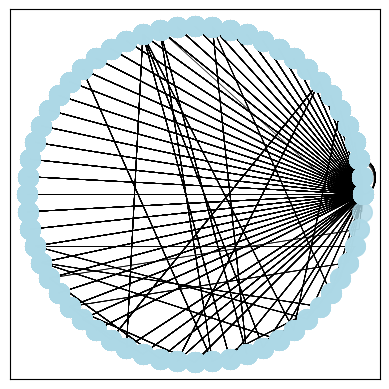

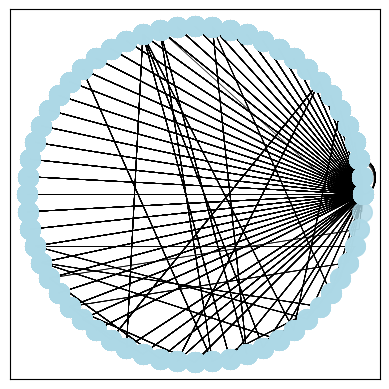

In [64]:
# Initialize drawing
G, pos = _get_initial_positions(desired_num_vertices)
_configure_plot(pos)

# m0 in the wikipedia article on Barabasi Albert network
vertex_set: set[int] = set( range(40))
# edge_set: set[tuple[int,int]] = all_edges(40) # {(0,1),(0,2),(0,3),(0,4),(0,5) }#,(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)}
edge_set: set[tuple[int,int]] = set([(0,i) for i in range(40)]) # {(0,1),(0,2),(0,3),(0,4),(0,5) }#,(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)}
 # {(0,1),(0,2),(0,3),(0,4),(0,5) }#,(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)}
degree_dict: dict[int,int] = {0:1, 1:1}

# Add edge
while len(vertex_set) <= desired_num_vertices:
    _update_plot(G, pos, vertex_set, edge_set, sleep_time=0)
    new_vertex = len(vertex_set)
    new_edges = add_edges_networkx_version(vertex_set, new_vertex, G, required_edges=2)
    vertex_set.add(new_vertex)
    edge_set.update(new_edges)

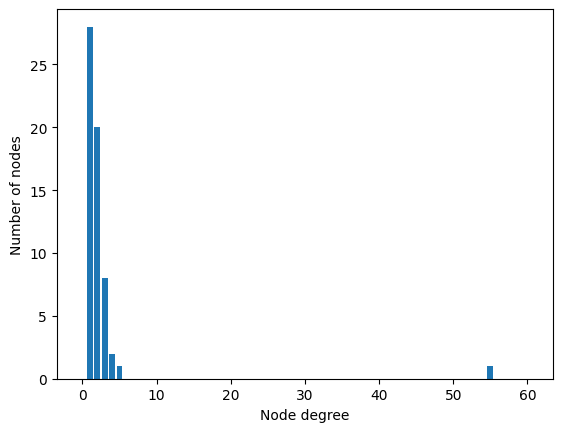

In [65]:
from plotting_utilities import show_degree_distribution


show_degree_distribution(G)


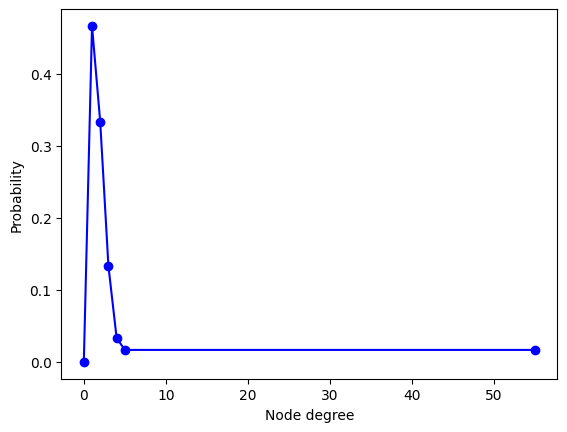

In [66]:
from network_utilities import get_degree_count_dictionary
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def show_degree_density(G: nx.Graph, plotting_method: Callable = plt.plot) -> None:
    degree_pairs: dict[int,int] = sorted(get_degree_count_dictionary(G).items())
    x = [degree for degree, _ in degree_pairs]
    y = [count for _, count in degree_pairs]
    if 0 not in x:
        x.insert(0,0)
        y.insert(0,0)
    y = y / np.sum(y)
    #plt.loglog(x,y)
    plotting_method(x,y,'b-o')
    plt.xlabel('Node degree')
    plt.ylabel('Probability')

show_degree_density(G)




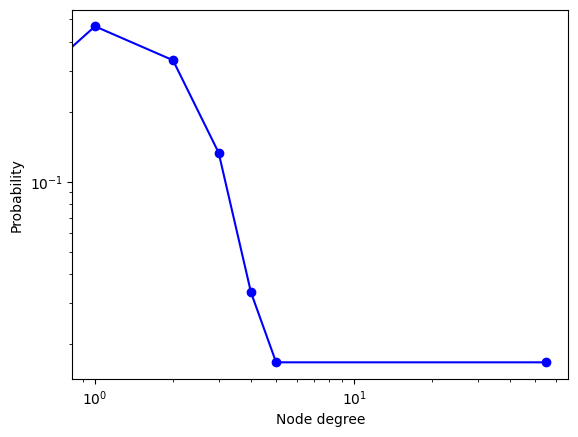

In [67]:
show_degree_density(G, plotting_method = plt.loglog)